In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [107]:
#読み込み
wine_data = pd.read_csv("train.tsv",delimiter='\t')
wine_test_data = pd.read_csv("test.tsv",delimiter='\t')

# データ確認

◆カラム数  
id：列番  
Y：正解  
その他：13種類  
  
◆欠損値  
なし  
  
◆外れ値  
Malic acid  
Ash  
Alcalinity of ash  
Magnesium  
Color intensity  
Hue  
Proline    
  
  
  
  
  

In [108]:
#data columns
wine_data.columns

Index(['id', 'Y', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [109]:
wine_data.dtypes

id                                int64
Y                                 int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [110]:
#基本情報
wine_data.drop(["id"],axis=1).describe()

,Y,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,1.955056,12.997079,2.280225,2.387640,19.617978,100.516854,2.319326,2.048315,0.357191,1.592584,5.087303,0.968315,2.604607,745.303371
std,0.767376,0.823056,1.139636,0.305134,3.991086,14.281355,0.579058,1.004159,0.129930,0.616166,2.371440,0.229932,0.695820,318.135777
min,1.000000,11.030000,0.740000,1.360000,10.600000,78.000000,1.300000,0.480000,0.130000,0.410000,1.900000,0.550000,1.290000,312.000000
25%,1.000000,12.370000,1.570000,2.240000,16.800000,89.000000,1.850000,1.250000,0.260000,1.150000,3.270000,0.800000,2.010000,510.000000
50%,2.000000,13.050000,1.780000,2.380000,19.600000,98.000000,2.360000,2.110000,0.340000,1.550000,4.680000,0.980000,2.780000,678.000000
75%,3.000000,13.560000,2.990000,2.610000,22.000000,108.000000,2.800000,2.890000,0.470000,1.980000,6.000000,1.120000,3.160000,920.000000
max,3.000000,14.830000,5.650000,3.230000,30.000000,151.000000,3.850000,5.080000,0.630000,2.960000,13.000000,1.710000,3.920000,1680.000000


In [111]:
#欠損値の確認
wine_data.isnull().sum()

id                              0
Y                               0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

説明変数

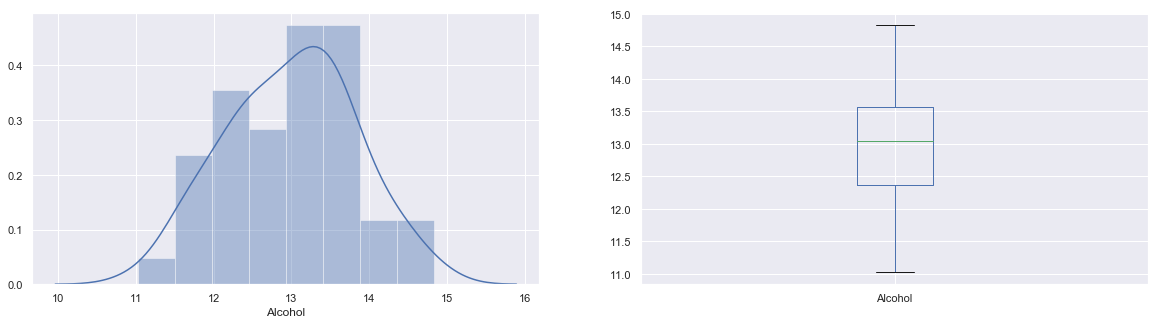

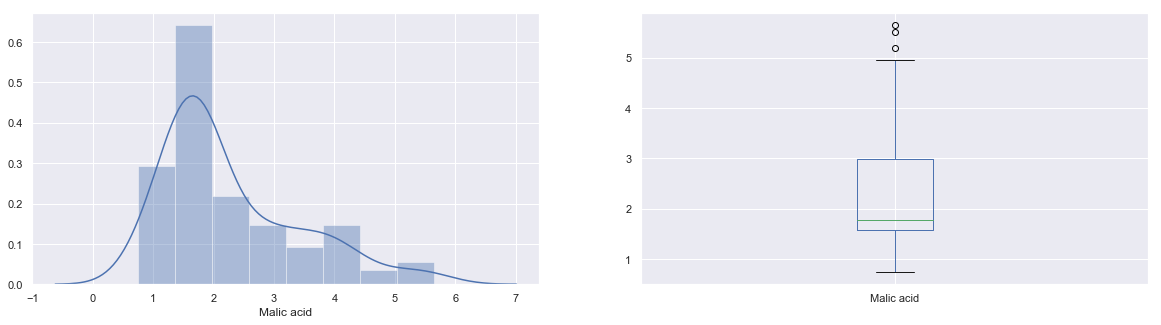

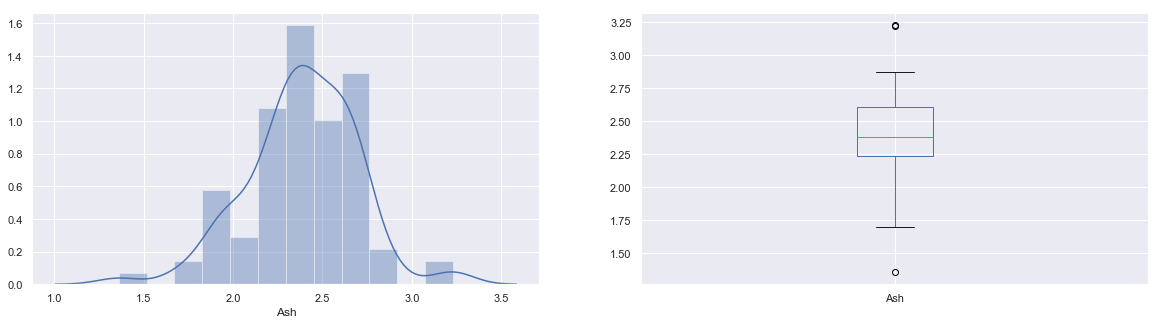

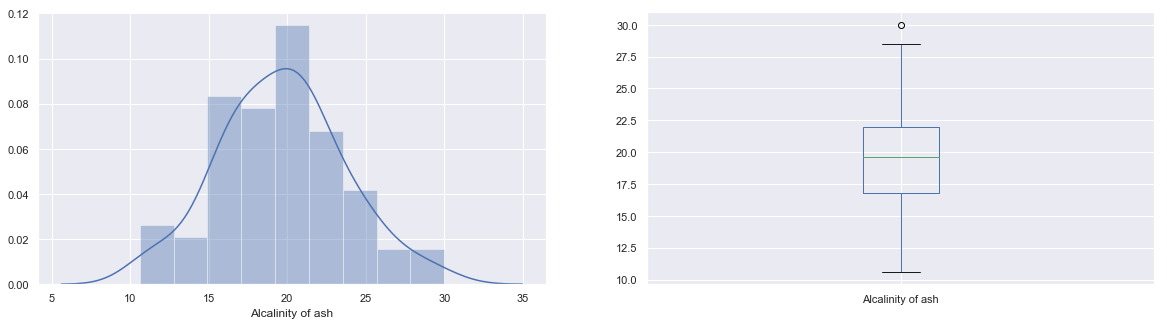

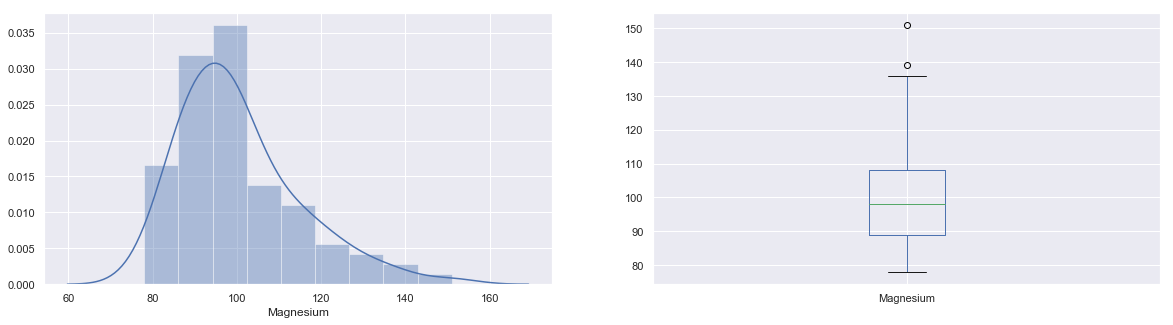

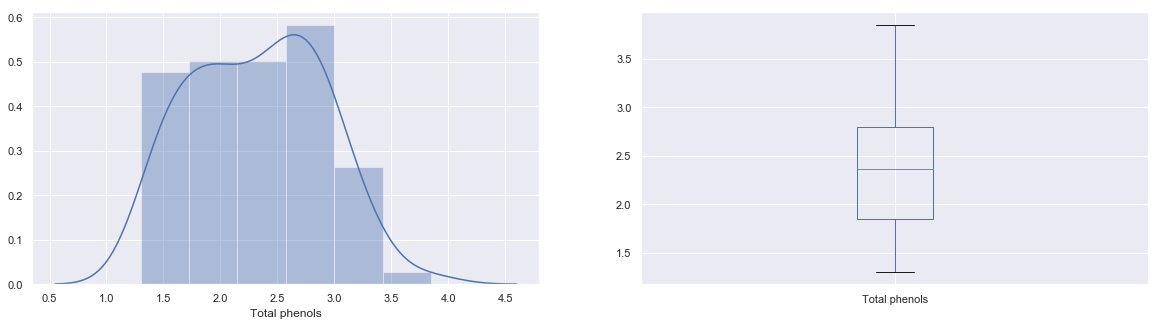

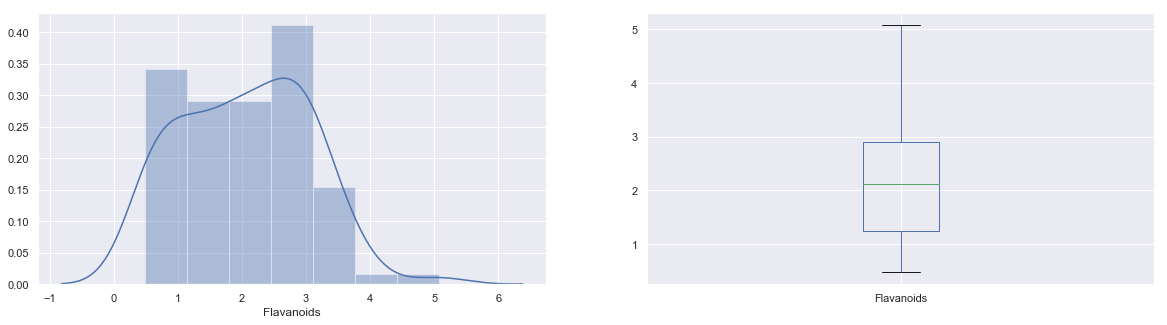

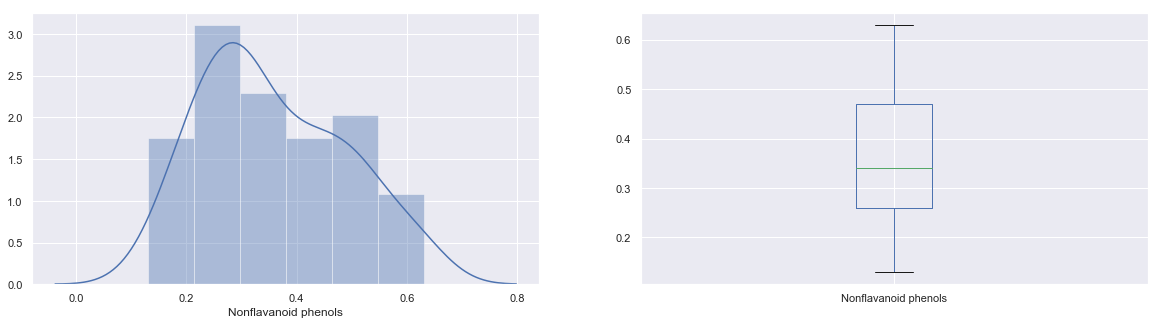

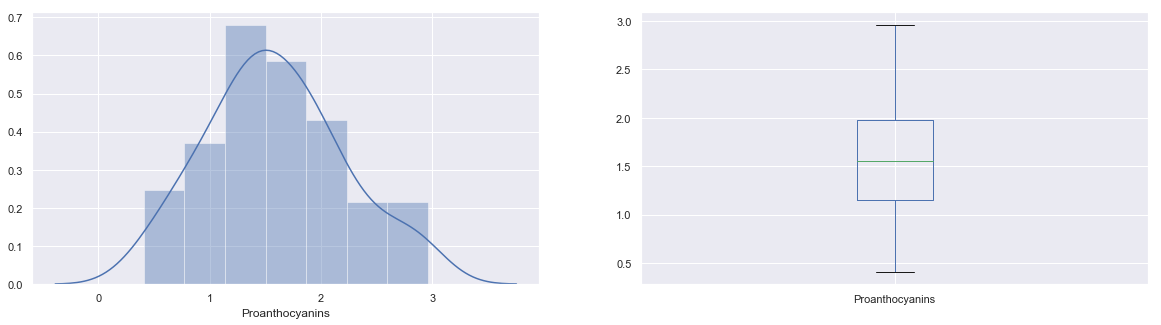

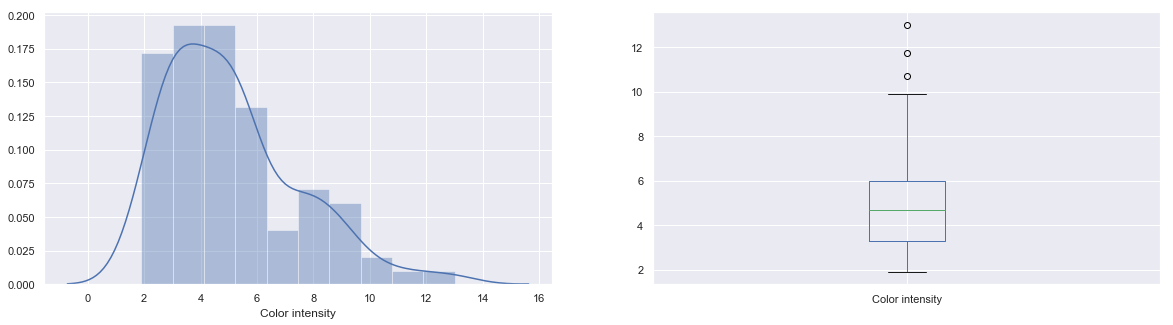

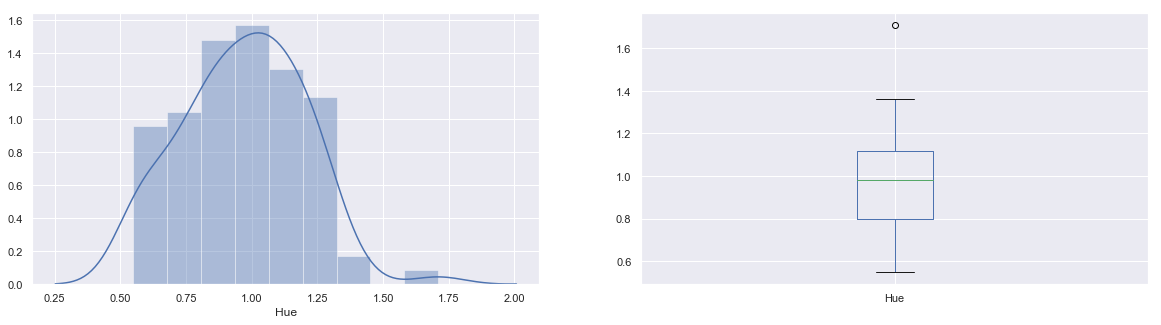

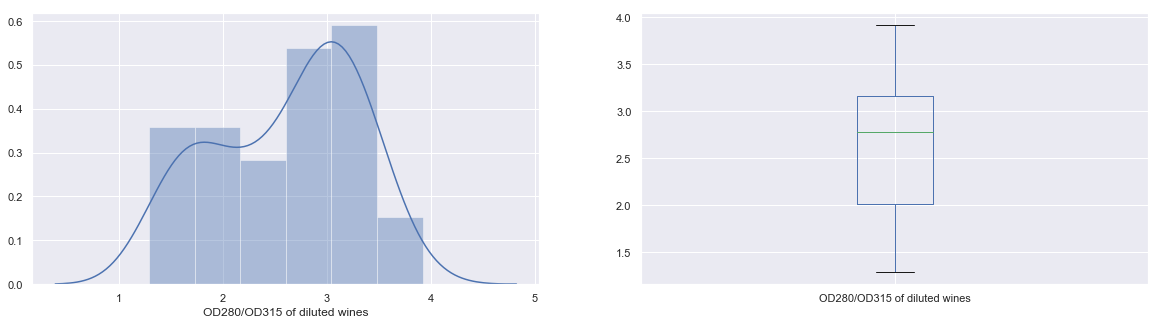

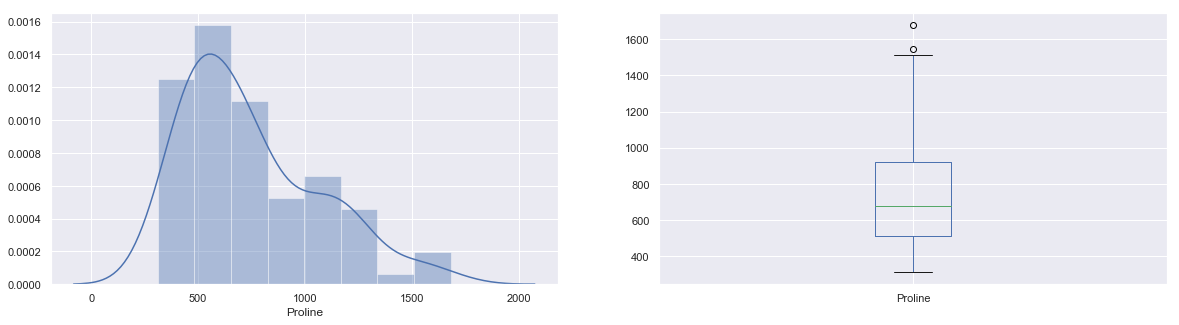

In [112]:
#float型のカラム
#ヒストグラムと箱ひげ図で確認する
#enumerateでindexと要素を同時に出力できる
wine = wine_data.drop(["id","Y"],axis=1)
for index,column in enumerate(wine.columns):
    plt.figure(num=1, figsize=(20, 5))#図の幅と高さ
    
    plt.subplot(1, 2, 1)
    #ヒストグラムを描画
    sns.distplot(wine[column])
    #
    plt.subplot(1, 2, 2)
    wine[column].plot.box()

    plt.show()

相関関係

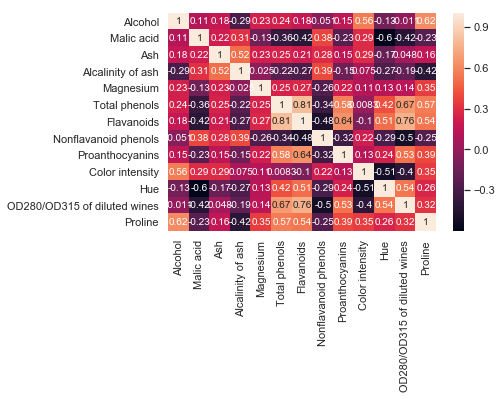

In [113]:
#相関関係の確認
matrix = wine.corr()

#ヒートマップで確認
sns.heatmap(matrix,annot=True)

外れ値の加工

四分位範囲を計算  
iqr = 75％点 - 25%点  

上限 75% + (iqr * 1.5)  
下限 25% - (iqr * 1.5)

1：外れ値を平均値に変換する

In [ ]:
#各カラムごとに外れ値を平均値に変換する

In [233]:
#各カラムの25%と75%点を算出する
wine_data_drop_id = wine_data.drop(["id","Y"],axis=1)

q25 = wine_data_drop_id.quantile(0.25)
q75 = wine_data_drop_id.quantile(0.75)

iqr = q75 - q25
#下限
lower_bound = q25 - (iqr * 1.5)

#上限
upper_bound = q75 + (iqr * 1.5)

#平均値
wine_mean = wine_data_drop_id.mean()
print(lower_bound)
print(upper_bound)

Alcohol                          10.585
Malic acid                       -0.560
Ash                               1.685
Alcalinity of ash                 9.000
Magnesium                        60.500
Total phenols                     0.425
Flavanoids                       -1.210
Nonflavanoid phenols             -0.055
Proanthocyanins                  -0.095
Color intensity                  -0.825
Hue                               0.320
OD280/OD315 of diluted wines      0.285
Proline                        -105.000
dtype: float64
Alcohol                           15.345
Malic acid                         5.120
Ash                                3.165
Alcalinity of ash                 29.800
Magnesium                        136.500
Total phenols                      4.225
Flavanoids                         5.350
Nonflavanoid phenols               0.785
Proanthocyanins                    3.225
Color intensity                   10.095
Hue                                1.600
OD280/OD315 of

In [234]:
for col in wine_data_drop_id:
    #25%以下の場合 平均値に置き換える
    wine_data_drop_id.loc[wine_data_drop_id[col]<=lower_bound[col],col] = lower_bound[col]    
    #75%以上の場合 平均値に置き換える
    wine_data_drop_id.loc[wine_data_drop_id[col]>=upper_bound[col],col] = upper_bound[col]
    
    

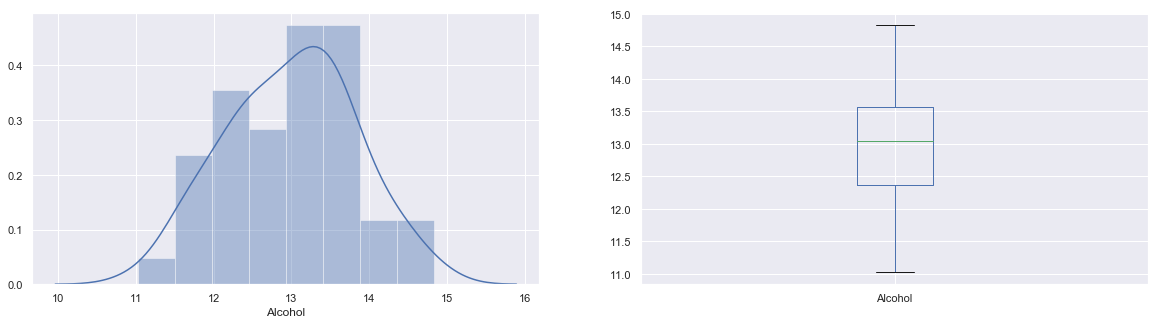

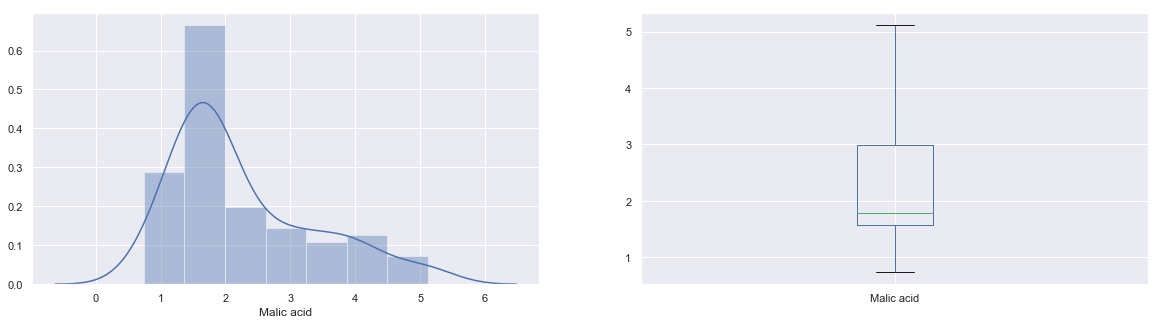

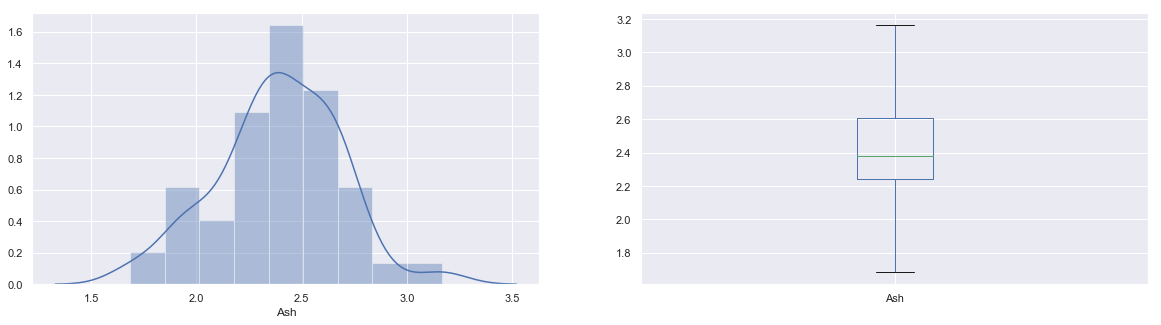

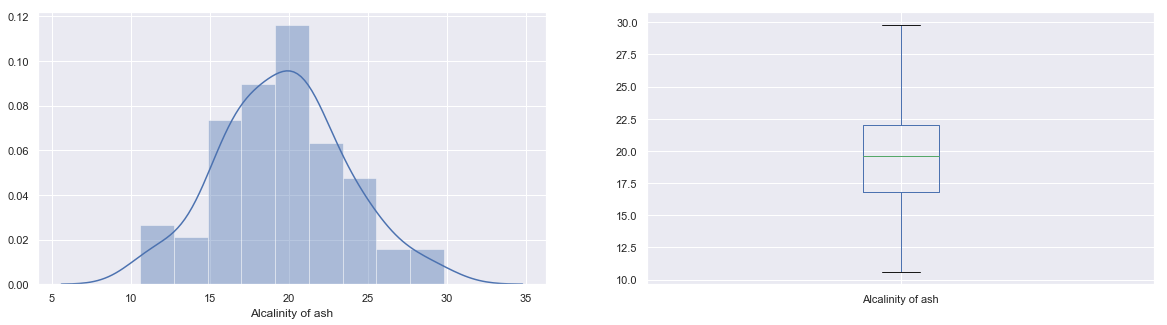

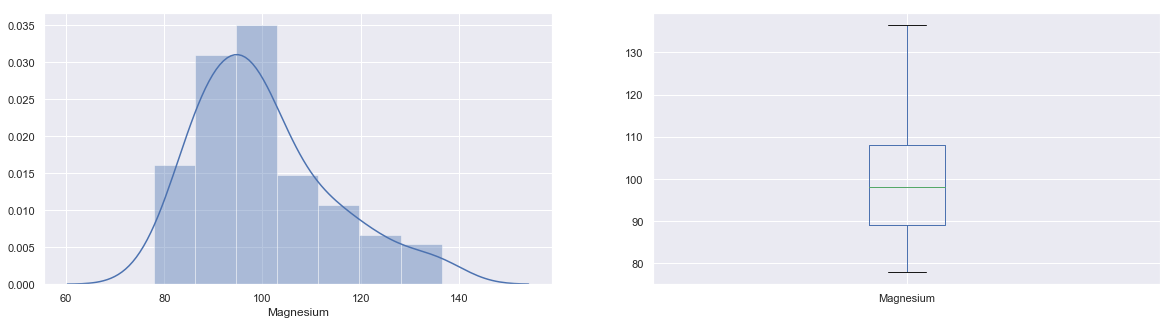

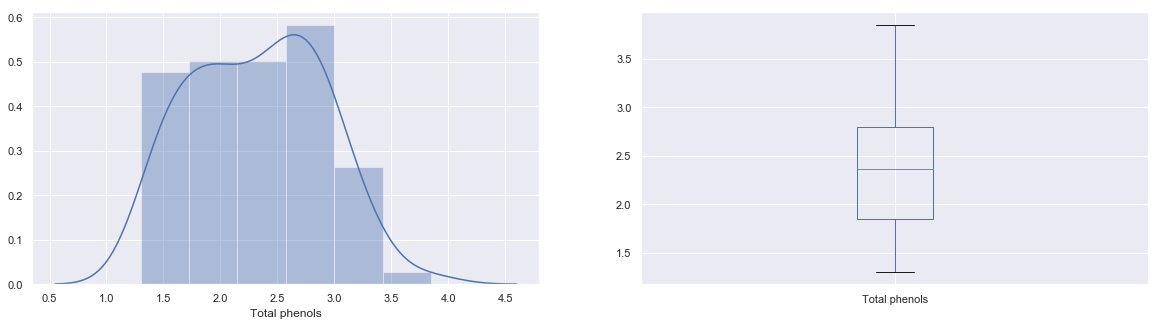

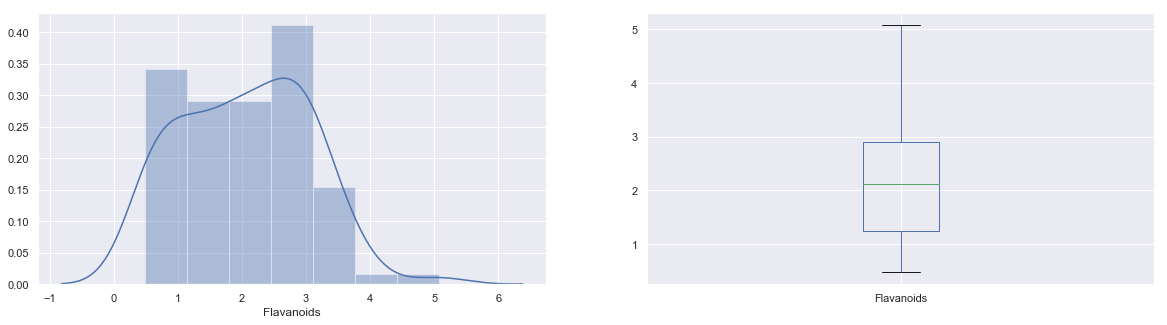

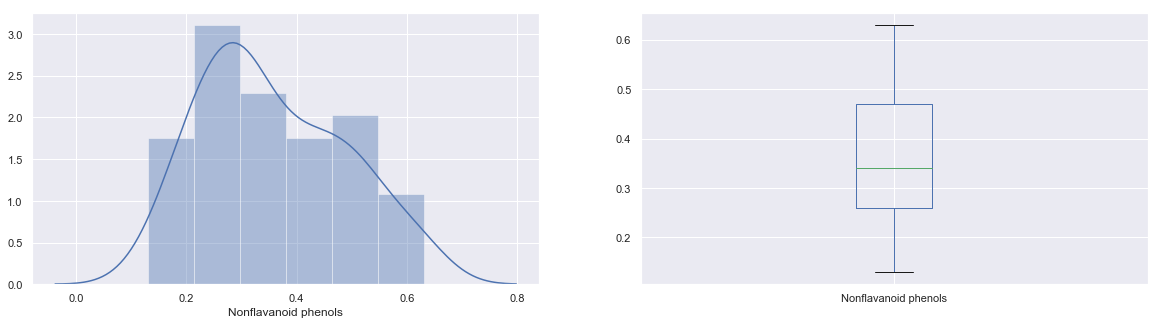

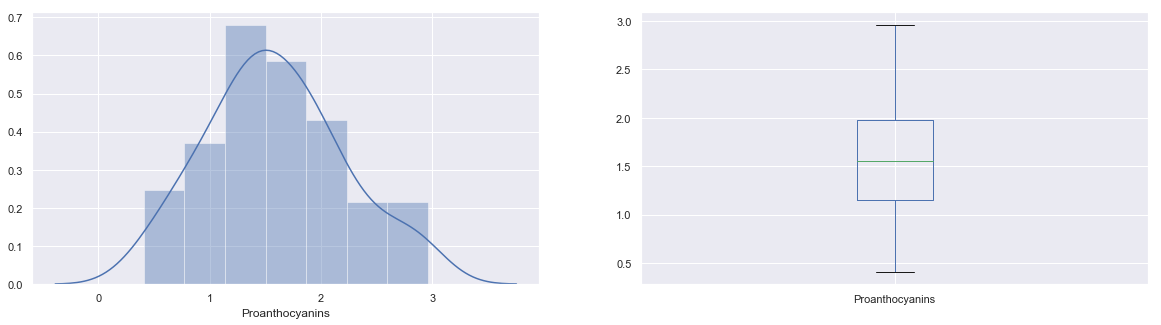

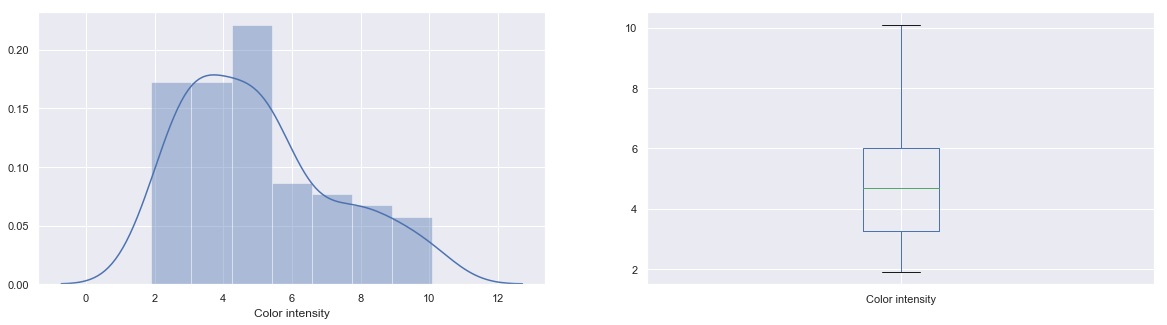

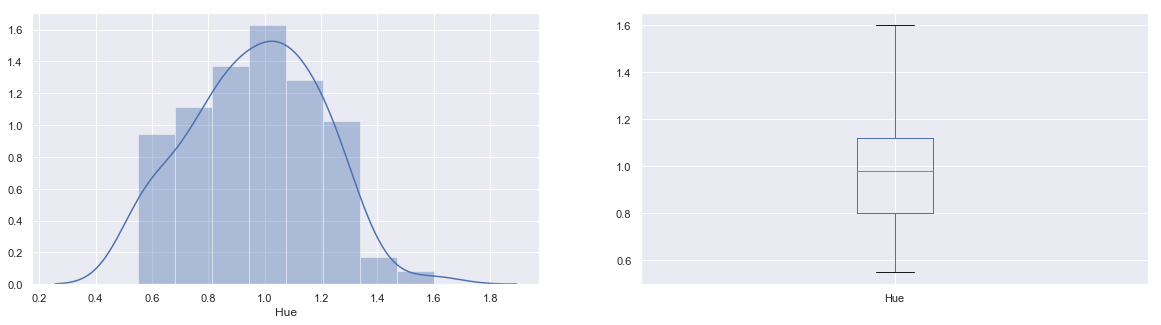

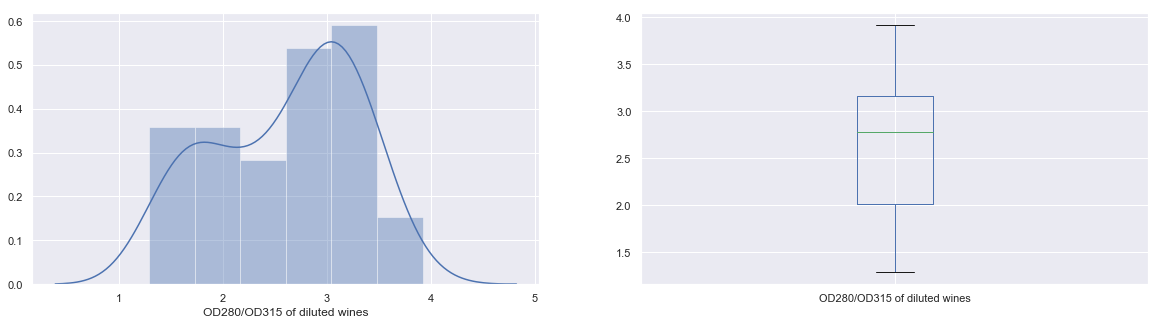

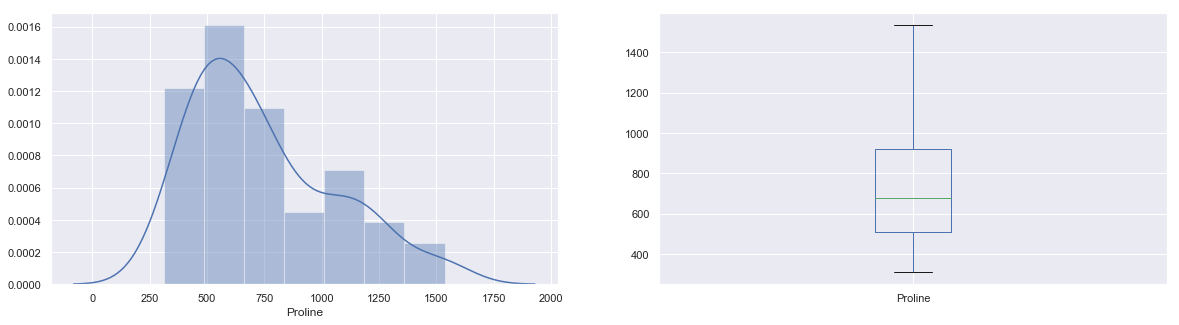

In [235]:
#変更後の確認
wine =wine_data_drop_id
for index,column in enumerate(wine.columns):
    plt.figure(num=1, figsize=(20, 5))#図の幅と高さ
    
    plt.subplot(1, 2, 1)
    #ヒストグラムを描画
    sns.distplot(wine[column])
    #
    plt.subplot(1, 2, 2)
    wine[column].plot.box()

    plt.show()

In [236]:
for col in wine_data_drop_id:
    print(col)
    print(upper_bound[col])
    for i in wine_data_drop_id[col]:
        if i >= upper_bound[col]:
            print(i)
            print("---")

Alcohol
15.345000000000002
Malic acid
5.120000000000001
5.120000000000001
---
5.120000000000001
---
5.120000000000001
---
Ash
3.164999999999999
3.164999999999999
---
3.164999999999999
---
Alcalinity of ash
29.799999999999997
29.799999999999997
---
Magnesium
136.5
136.5
---
136.5
---
Total phenols
4.225
Flavanoids
5.35
Nonflavanoid phenols
0.7849999999999999
Proanthocyanins
3.225
Color intensity
10.094999999999999
10.094999999999999
---
10.094999999999999
---
10.094999999999999
---
Hue
1.6
1.6
---
OD280/OD315 of diluted wines
4.885000000000001
Proline
1535.0
1535.0
---
1535.0
---


25%点、75%点で収まったのでいったんモデル作成をする


In [237]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [271]:
X = wine_data_drop_id
Y = wine_data["Y"]

In [275]:
#比率は3:7
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [276]:
#モデルの作成
clf = RandomForestClassifier(n_estimators=2000,max_depth=3,random_state=1,min_samples_leaf=4)

clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [277]:
#testデータでのscore
score = clf.score(X_test,y_test)
print("score: ",score)

score:  0.9629629629629629


testデータにあててみる

In [278]:
#testdata
y_test_data = wine_test_data.drop(["id"],axis=1)

In [279]:
result = clf.predict(y_test_data)

In [280]:
# 提出用に加工
np_id = wine_test_data['id'].values
dd=pd.DataFrame({"id":np_id, "ans":result})
dd.to_csv("result02.csv",header=False,index=False)
dd

,id,ans
0,2,1
1,4,3
2,5,2
3,7,2
4,8,1
5,10,1
6,16,2
7,18,2
8,19,1
9,22,2


random_state 1  
n_estimators=2000,max_depth=3,random_state=0,min_samples_leaf=4  
25% 75% に変更  
98.8%